In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "/Users/lauradang/traffic-light/dataset-sdcnd-capstone/data/real_training_data"
CATEGORIES = ['green', 'yellow', 'red']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    print(path)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

/Users/lauradang/traffic-light/dataset-sdcnd-capstone/data/real_training_data/green


<Figure size 640x480 with 1 Axes>

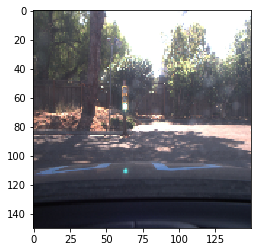

In [2]:
IMG_SIZE = 150
new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
training_data = []

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    print(class_num)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
            new_array = np.expand_dims(new_array, axis=0)
            training_data.append([new_array, class_num])
        except Exception as e:
            pass

0
1
2


In [4]:
print(len(training_data))

642


In [5]:
import random

random.shuffle(training_data)

In [6]:
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(150,150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))

In [22]:
X 

[array([[[[ 61,  59,  51],
          [ 61,  55,  50],
          [ 68,  61,  52],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
 
         [[ 64,  69,  63],
          [ 63,  55,  49],
          [ 69,  62,  53],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
 
         [[ 65,  64,  54],
          [ 63,  59,  51],
          [ 72,  62,  52],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
 
         ...,
 
         [[ 23,  16,  13],
          [ 24,  17,  14],
          [ 24,  17,  14],
          ...,
          [ 54,  42,  32],
          [ 53,  39,  29],
          [ 50,  38,  28]],
 
         [[ 25,  18,  14],
          [ 25,  18,  15],
          [ 25,  18,  15],
          ...,
          [ 60,  46,  34],
          [ 59,  45,  33],
          [ 55,  40,  32]],
 
         [[ 24,  19,  16],
          [ 25,  17,  17],
          [ 24,  16,  16],
   

In [20]:
from sklearn.model_selection import train_test_split
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

ValueError: Input arrays should have the same number of samples as target arrays. Found 1 input samples and 513 target samples.

In [ ]:
len(y_train)